In [12]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import utils
%matplotlib inline
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')

In [13]:
data = pd.read_csv('data/beer.csv')
data

,Color,IBU,IsIPA
0,-0.652164,-0.970233,0
1,-0.377297,1.387356,1
2,0.183752,0.442296,0
3,1.040796,1.259266,0
4,-0.086886,1.568275,1
...,...,...,...
995,1.147303,-0.203213,0
996,0.157874,0.421977,0
997,-0.005116,1.119753,1
998,-0.405469,0.428315,1


In [14]:
X_train = data[['Color','IBU']].to_numpy()
y_train = data['IsIPA'].to_numpy()

In [15]:
X_train.shape

(1000, 2)

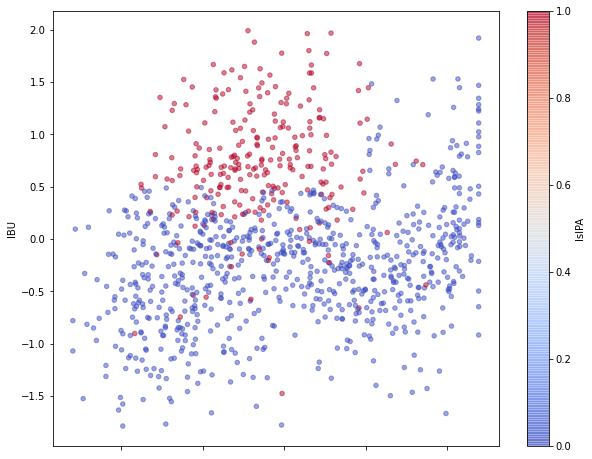

In [16]:
data.plot(kind='scatter', x='Color', y='IBU', c='IsIPA', colormap='coolwarm', figsize=(10, 8), alpha=.5)

In [18]:
scaler = MinMaxScaler(feature_range=(0, 1))
# Fit your class
scaler.fit(X_train)
# Transform your data
normalized_X = scaler.transform(X_train)
logit_clf = LogisticRegression(random_state=0)
logit_clf.fit(normalized_X, y_train)
logit_clf.score(normalized_X, y_train)
preds = logit_clf.predict(normalized_X)
probas = logit_clf.predict_proba(normalized_X)

In [21]:
coefficients = logit_clf.coef_.reshape(-1,1)
intercept = logit_clf.intercept_
betas = np.concatenate((np.array([intercept]),coefficients))

In [23]:
from sklearn.metrics import accuracy_score

In [24]:
accuracy_score(y_train, preds)

0.875